In [107]:
import xml.dom.minidom as minidom
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import FancyBboxPatch
import numpy as np
import pandas as pd

plt.style.use('helv_math')
# import networkx as nx
# import pygraphviz as pgv
# from networkx.drawing.nx_agraph import graphviz_layout

In [108]:
def get_node_attr_from_cytoscape(xgmml_filename):
    doc = minidom.parse(xgmml_filename)

    nodes = {}
    for node in doc.getElementsByTagName("node"):
        for att in node.getElementsByTagName("att"):
            if att.getAttribute("name") == "shared name":
                shared_name = att.getAttribute("value")
                graphic = node.getElementsByTagName("graphics")
                if graphic:
                    graphic = graphic[0]
                else:
                    continue
                att = {
                    "name": node.getAttribute("label"),
                    "id": int(node.getAttribute("id")),
                    "shared_name": shared_name,
                    "x": float(graphic.getAttribute("x")),
                    "y": -float(graphic.getAttribute("y")), # in cytoscape y are negative at the top and positive at the bottom, it's the opposite in matplotlib so we multiply by -1
                    "w": float(graphic.getAttribute("w")),
                    "h": float(graphic.getAttribute("h"))}
                nodes[node.getAttribute("id")] = att
    
    # transform coord to remove negative values
    min_x = min(v["x"] for v in nodes.values())
    min_y = min(v["y"] for v in nodes.values())
    
    for node in nodes:
        nodes[node]["x"] = nodes[node]["x"] + abs(min_x)
        nodes[node]["y"] = nodes[node]["y"] + abs(min_y)
    
    edges = {}
    for edge in doc.getElementsByTagName("edge"):
        source = edge.getAttribute("source")
        target = edge.getAttribute("target")
        
        if not all(e in nodes for e in [source, target]):
            continue
        att = {"source": int(source), "target": int(target)}
        edges[edge.getAttribute("id")] = att
        
    return nodes, edges

In [109]:
up_down_df = pd.read_csv("/users/mickaelm/mnt/mickaelm/MLf5onto/Results/25_pyRRF_500_new_onto/SPI1.new.tsv", sep="\t", index_col=0)

In [391]:
nodes, edges = get_node_attr_from_cytoscape("edges_name.tsv.xgmml")

columns = ["up", "down", "other"]

for node in nodes:
    if nodes[node]["name"] == "sac":
        nodes[node]["color"] = "orange"
        nodes[node]["type"] = "short_node"
    elif nodes[node]["name"] == "mc":
        nodes[node]["color"] = "green"
        nodes[node]["type"] = "short_node"
    else:
        if nodes[node]["name"] == "stuff accumulating cell":
            nodes[node]["color"] = "orange"
        elif nodes[node]["name"] == "motile cell":
            nodes[node]["color"] = "green"
        else:
            nodes[node]["color"] = "black"
        nodes[node]["type"] = "chart_node"
        node_name = nodes[node]["shared_name"]
        
        
        if node_name in up_down_df.index:
            values = up_down_df.loc[node_name, columns].tolist()
        else:
            values = (0., 0., 1.)
        
        for tag, val in zip(columns, values):
            nodes[node][tag] = val

In [393]:
# PAD = 6
# def custom_node_left(node, t_display, ax, fig):
#     renderer = fig.canvas.get_renderer()
    
#     # display coord of text + bbox
#     graph_w_display, graph_h_display = (t_display["h"], t_display["h"])
#     graph_w_fig, graph_h_fig = fig.transFigure.inverted().transform((graph_w_display, graph_h_display))
#     graph_x_display, graph_y_display = (t_display["p0x"]-graph_w_display, t_display["p0y"])
#     graph_x1_display, graph_y1_display = (t_display["p1x"], t_display["p1y"])

#     graph_x_fig, graph_y_fig = fig.transFigure.inverted().transform((graph_x_display, graph_y_display))

#     ax1 = fig.add_axes([graph_x_fig, graph_y_fig, graph_w_fig, graph_h_fig])
#     up, down, other = (node["up"], node["down"], node["other"])
#     count_sum = up + down + other
#     up = up/count_sum
#     down = down/count_sum
#     other = other/count_sum
  
#     ax1.barh([1], [up], color="#fb9a99", edgecolor="whitesmoke")
#     ax1.barh([1], [down], left=[up], color="#a6cee3", edgecolor="whitesmoke")
#     ax1.barh([1], [other], left=[up+down], color="lightgray", edgecolor="whitesmoke")
#     ax1.set_xlim(-0.05, 1.05)
#     ax1.set_ylim(0.45, 1.55)
#     ax1.set_yticks([])
#     ax1.set_xticks([])
# #     ax1.axis("off")

#     # draw major patch combining text and graph
#     major_x_data, major_y_data = ax.transData.inverted().transform((graph_x_display, graph_y_display))
#     major_x1_data, major_y1_data = ax.transData.inverted().transform((graph_x1_display, graph_y1_display))
#     major_w_data = major_x1_data - major_x_data
#     major_h_data = major_y1_data - major_y_data
    
#     rect = Rectangle((major_x_data-1,major_y_data-1),major_w_data+2, major_h_data+2, linewidth=1,edgecolor='none',facecolor='none')
#     p = ax.add_patch(rect)

#     return p

In [394]:
# pd.DataFrame.from_dict(nodes.values()).sort_values("y").to_csv("node_coord.tsv", sep="\t")

In [383]:
# nodes = {n[1]["id"]: n[1] for n in pd.read_csv("node_coord.tsv", sep="\t", index_col=0).T.to_dict().items()}
# for node in nodes:
#     nodes[node]["name"] = nodes[node]["name"].replace("\\n", " ")
# #     nodes[node]["name"] = nodes[node]["name"].replace("\\n", "\n")

In [384]:
# for node_id in nodes:
#     node_name = nodes[node_id]["name"]
#     n = 10
#     if (len(node_name) > n) and (" " in node_name[n:]):
#         prefix = node_name[:n]
#         suffix = "\n".join(node_name[n:].split(" ", 1))
#         nodes[node_id]["name"] = prefix + suffix

In [385]:
# PAD = 0
# def custom_node_bottom(node, t_display, chart_width_display, height_display, ax, fig):
#     # display coord of text + bbox
#     graph_w_display, graph_h_display = (chart_width_display, height_display)
#     graph_w_fig, graph_h_fig = fig.transFigure.inverted().transform((graph_w_display, graph_h_display))
#     graph_x_display = t_display["p0x"] + (t_display["w"]-chart_width_display)/2
#     graph_y_display = t_display["p0y"] - height_display
#     graph_x1_display, graph_y1_display = (graph_x_display+chart_width_display, t_display["p0y"])

#     graph_x_fig, graph_y_fig = fig.transFigure.inverted().transform((graph_x_display, graph_y_display))

#     ax1 = fig.add_axes([graph_x_fig, graph_y_fig, graph_w_fig, graph_h_fig])
#     up, down, other = (node["up"], node["down"], node["other"])
#     count_sum = up + down + other
#     up = up/count_sum
#     down = down/count_sum
#     other = other/count_sum
  
#     ax1.barh([1], [up], color="#fb9a99", edgecolor="whitesmoke")
#     ax1.barh([1], [down], left=[up], color="#a6cee3", edgecolor="whitesmoke")
#     ax1.barh([1], [other], left=[up+down], color="lightgray", edgecolor="whitesmoke")
#     ax1.set_xlim(-0.05, 1.05)
#     ax1.set_ylim(0.45, 1.55)
#     ax1.set_yticks([])
#     ax1.set_xticks([])
#     ax1.axis("off")

#     # draw major patch combining text and graph
#     major_x_data, major_y_data = ax.transData.inverted().transform((min(t_display["p0x"], graph_x_display), t_display["p0y"] - height_display))
#     major_x1_data, major_y1_data = ax.transData.inverted().transform((max(t_display["p1x"], graph_x1_display), t_display["p1y"]))
#     major_w_data = major_x1_data - major_x_data
#     major_h_data = major_y1_data - major_y_data
    
#     rect = FancyBboxPatch((major_x_data-1,major_y_data-1),major_w_data+2, major_h_data+2, linewidth=1,edgecolor='grey',facecolor='none', boxstyle="round,pad=10")
#     p = ax.add_patch(rect)

#     return p

In [395]:
# fig, ax = plt.subplots(figsize=(35,25))

# ax.set_ylim(-100, 2800)
# ax.set_xlim(-250, 3000)
# node_to_text_display = {}
# node_to_text = {}
# node_to_patch = {}
# node_to_patch_center = {}

# for node_id, node in nodes.items():
#     if node["type"] == "chart_node":
#         t = ax.text(node["x"], node["y"], node["name"], ha="center", va="center", fontsize=16)#, bbox=bbox)

#         renderer = fig.canvas.get_renderer()

#         # get display coord of the text (bbox not included)
#         # so we manually add PAD
#         bbox_text = t.get_window_extent(renderer=renderer)
#         t_display = {
#             "w": bbox_text.width + PAD*2,
#             "h": bbox_text.height + PAD*2,
#             "p0x": bbox_text.p0[0]-PAD,
#             "p0y": bbox_text.p0[1]-PAD,
#             "p1x": bbox_text.p1[0]+PAD,
#             "p1y": bbox_text.p1[1]+PAD,}

#         node_to_text_display[node_id] = t_display
#         node_to_text[node_id] = t

# wideleast_node = min([node_to_text_display[node["id"]] for node in nodes.values() if node["type"] == "chart_node"],
#                     key=lambda x: x["w"])
# wideleast_display = wideleast_node["w"]

# mean_height_display = pd.np.mean([node_to_text_display[node["id"]]["h"] for node in nodes.values() if node["type"] == "chart_node"])

# for node_id, node in nodes.items():
#     if node["type"] == "chart_node":
#         p = custom_node_bottom(node, node_to_text_display[node_id], wideleast_display+40, mean_height_display, ax, fig)
# #         p = custom_node_left(node, node_to_text_display[node_id], ax, fig)
#         node_to_patch[node_id] = p
    
#         node_to_patch_center[node_id] = {
#             "x": p.get_x() + p.get_width()/2,
#             "y": p.get_y() + p.get_height()/2}
#     else:
#         node_to_patch_center[node_id] = {"x": node["x"], "y": node["y"]}
#         bbox = dict(facecolor='none', edgecolor=node["color"], alpha=0.5, boxstyle="round,pad=.9")
#         t = ax.text(node["x"], node["y"], node["name"], ha="center", va="center", fontsize=15, bbox=bbox)
#         node_to_patch[node_id] = t
        

# for edge_id, edge in edges.items():
#     v, u = (edge["source"], edge["target"])
#     pos_u, pos_v = (node_to_patch_center[u], node_to_patch_center[v])
#     arrow_coord = (pos_u["x"], pos_u["y"], pos_v["x"], pos_v["y"])
#     ux,uy, vx, vy = arrow_coord
#     ax.annotate("", (vx,vy), xytext=(ux,uy), arrowprops=dict(
#         facecolor='black', patchA=node_to_patch[u], patchB=node_to_patch[v], shrinkA=.1, shrinkB=20,lw=.01,ec="black",headwidth=5,headlength=6,width=1))
# ax.axis("off")
# # fig.savefig("cl_spi1_newline.pdf", bbox_inches='tight')
# # fig.savefig("cl_spi1_newline.png", bbox_inches='tight')

In [399]:
nodes = {n[1]["id"]: n[1] for n in pd.read_csv("node_coord.tsv", sep="\t", index_col=0).T.to_dict().items()}
for node in nodes:
    nodes[node]["name"] = nodes[node]["name"].replace("\\n", " ")
    
    name = ""
    for word in nodes[node]["name"].split():
        if len(word) > 2:
            name += word + "\n"
        else:
            name += word + " "
        
    nodes[node]["name"] = name.rstrip()
#     nodes[node]["name"] = nodes[node]["name"].replace("\\n", "\n")

In [401]:
PAD = 0
def custom_node_bottom(node, t_display, chart_width_display, height_display, ax, fig):
    # display coord of text + bbox
    graph_w_display, graph_h_display = (chart_width_display, height_display)
    graph_w_fig, graph_h_fig = fig.transFigure.inverted().transform((graph_w_display, graph_h_display))
    graph_x_display = t_display["p0x"] + (t_display["w"]-chart_width_display)/2
    graph_y_display = t_display["p0y"] - height_display
    graph_x1_display, graph_y1_display = (graph_x_display+chart_width_display, t_display["p0y"])

    graph_x_fig, graph_y_fig = fig.transFigure.inverted().transform((graph_x_display, graph_y_display))

    ax1 = fig.add_axes([graph_x_fig, graph_y_fig, graph_w_fig, graph_h_fig])
    up, down, other = (node["up"], node["down"], node["other"])
    count_sum = up + down + other
    up = up/count_sum
    down = down/count_sum
    other = other/count_sum
  
    ax1.barh([1], [up], color="#fb9a99", edgecolor="whitesmoke")
    ax1.barh([1], [down], left=[up], color="#a6cee3", edgecolor="whitesmoke")
    ax1.barh([1], [other], left=[up+down], color="lightgray", edgecolor="whitesmoke")
    ax1.set_xlim(-0.05, 1.05)
    ax1.set_ylim(0.45, 1.55)
    ax1.set_yticks([])
    ax1.set_xticks([])
    ax1.axis("off")

    # draw major patch combining text and graph
    major_x_data, major_y_data = ax.transData.inverted().transform((min(t_display["p0x"], graph_x_display), t_display["p0y"] - height_display))
    major_x1_data, major_y1_data = ax.transData.inverted().transform((max(t_display["p1x"], graph_x1_display), t_display["p1y"]))
    major_w_data = major_x1_data - major_x_data
    major_h_data = major_y1_data - major_y_data
    
    rect = FancyBboxPatch((major_x_data-1,major_y_data-1),major_w_data+2, major_h_data+2, linewidth=1,edgecolor=node["color"],facecolor='none', boxstyle="round,pad=10")
    p = ax.add_patch(rect)

    return p

nodes_coord = {node_id: {"name": node["name"], "x": int(node["x"]), "y": int(node["y"])} for node_id, node in nodes.items()}

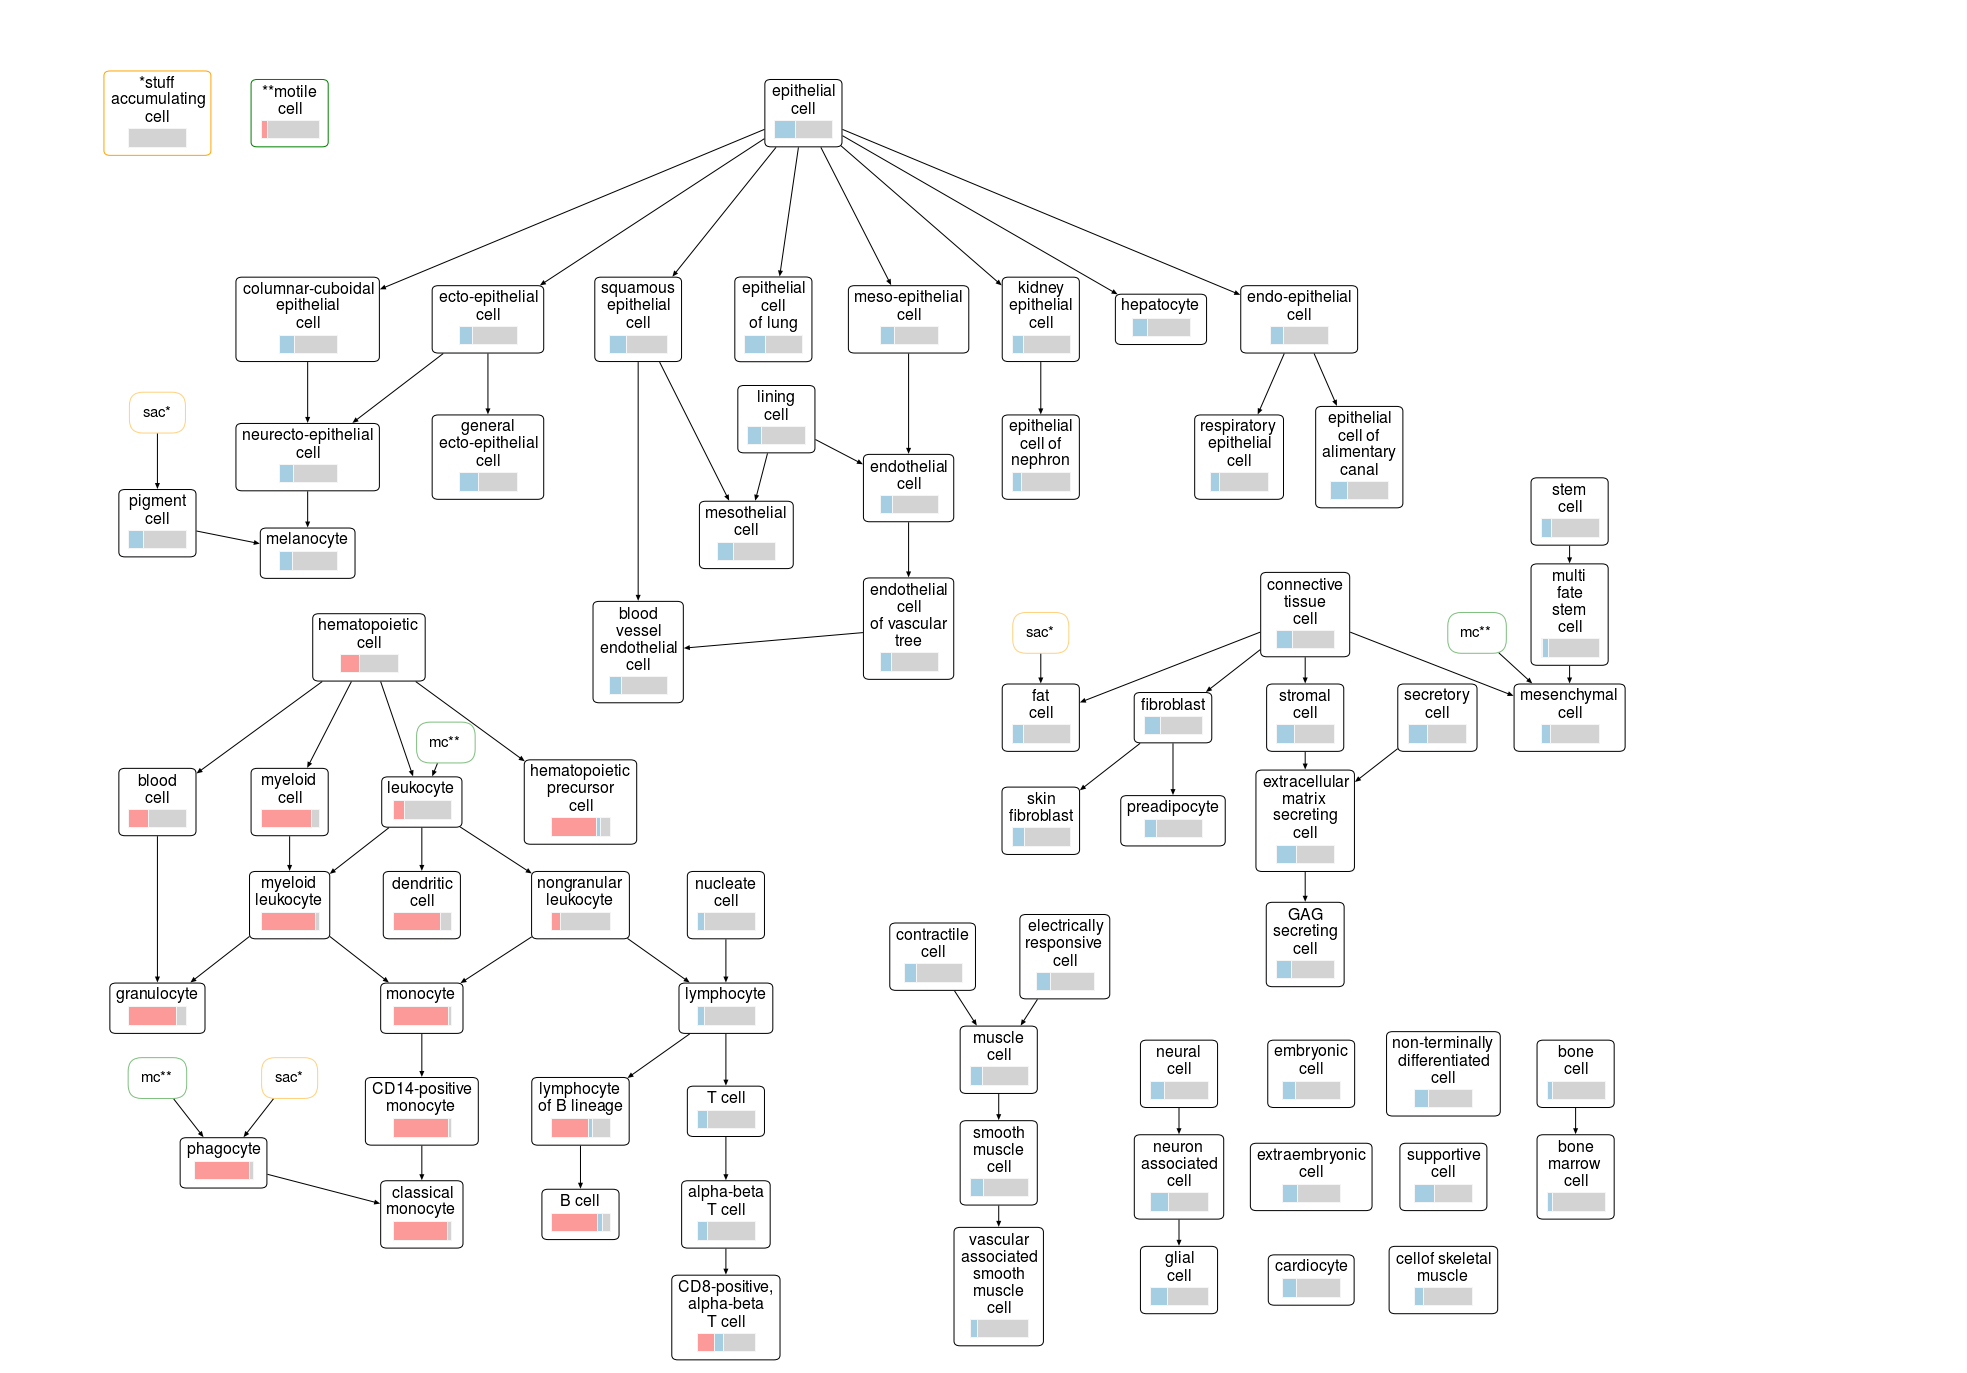

In [404]:
########## HEMAT ##########
hemat_x_dist = 220
hemat_cols = [0, hemat_x_dist*1, hemat_x_dist*2, hemat_x_dist*3.2, hemat_x_dist*4.3]

hemat_y_dist = 220
heamat_rows = [hemat_y_dist*0, hemat_y_dist*1, hemat_y_dist*2, 
              hemat_y_dist*3, hemat_y_dist*4, hemat_y_dist*5,
              hemat_y_dist*6]

for i in range(len(heamat_rows)):
    heamat_rows[i] = 1350 - heamat_rows[i] # yshift

nodes_coord_hemat = {
    29796: {'name': 'hematopoietic\ncell', 'x': (hemat_cols[3]-hemat_cols[0])/2, 'y': heamat_rows[0]+hemat_y_dist*0.5},
    
    29795: {'name': 'blood\ncell', 'x': 0, 'y': heamat_rows[1]},
        29800: {'name': 'granulocyte', 'x': 0, 'y': heamat_rows[3]},

    29833: {'name': 'myeloid\ncell', 'x': hemat_cols[1], 'y': heamat_rows[1]},
        29801: {'name': 'myeloid\nleukocyte', 'x': hemat_cols[1], 'y': heamat_rows[2]},
            29828: {'name': 'monocyte', 'x': hemat_cols[2], 'y': heamat_rows[3]},
                29835: {'name': 'CD14-positive\nmonocyte', 'x': hemat_cols[2], 'y': heamat_rows[4]},
                    29850: {'name': 'classical\nmonocyte', 'x': hemat_cols[2], 'y': heamat_rows[5]},
    
    29782: {'name': 'mc**', 'x': 480, 'y': 1230},
    29825: {'name': 'leukocyte', 'x': hemat_x_dist*2, 'y': heamat_rows[1]},
        29827: {'name': 'nongranular\nleukocyte', 'x':hemat_cols[3], 'y': heamat_rows[2]},
        29824: {'name': 'dendritic\ncell', 'x': hemat_cols[2], 'y': heamat_rows[2]},

    29849: {'name': 'phagocyte', 'x': (hemat_cols[1]-hemat_cols[0])/2, 'y': (heamat_rows[4]+heamat_rows[5])/2},
    29781: {'name': 'mc**', 'x': hemat_cols[0], 'y': heamat_rows[4]+hemat_y_dist*.2},
    29778: {'name': 'sac*', 'x': hemat_cols[1], 'y': heamat_rows[4]+hemat_y_dist*.2},
    29843: {'name': 'hematopoietic\nprecursor\ncell', 'x': hemat_cols[3], 'y': heamat_rows[1]},
    
29826: {'name': 'nucleate\ncell', 'x': hemat_cols[4], 'y': heamat_rows[2]},
    29799: {'name': 'lymphocyte', 'x': hemat_cols[4], 'y': heamat_rows[3]},
        29818: {'name': 'lymphocyte\nof B lineage', 'x': hemat_cols[3], 'y': heamat_rows[4]},
            29817: {'name': 'B cell', 'x': hemat_cols[3], 'y': heamat_rows[5]},
        29798: {'name': 'T cell', 'x': hemat_cols[4], 'y': heamat_rows[4]},
            29830: {'name': 'alpha-beta\nT cell', 'x': hemat_cols[4], 'y': heamat_rows[5]},
            29829: {'name': 'CD8-positive,\nalpha-beta\nT cell', 'x': hemat_cols[4], 'y': heamat_rows[6]},}    

########## EPITH ##########
first_row_y = 2160
nodes_coord_epith = {#1239

29788: {'name': 'epithelial\ncell', 'x': (250+1900)/2, 'y': 2600},
    
    29792: {'name': 'columnar-cuboidal\nepithelial\ncell', 'x': 250, 'y': first_row_y},
        29811: {'name': 'neurecto-epithelial\ncell', 'x': 250, 'y': 1866},
            29810: {'name': 'melanocyte', 'x': 250, 'y': 1661},
    54910: {'name': 'sac*', 'x': 0, 'y': 1934},
        29809: {'name': 'pigment\ncell', 'x': 0, 'y': 1725},

    29832: {'name': 'ecto-epithelial\ncell', 'x': 550, 'y': first_row_y},
        29838: {'name': 'general\necto-epithelial\ncell', 'x': 550, 'y': 1866},
    
    29790: {'name': 'squamous\nepithelial\ncell', 'x': 800, 'y': first_row_y},
        29793: {'name': 'mesothelial\ncell', 'x': 980, 'y': 1700},
        29789: {'name': 'blood\nvessel\nendothelial\ncell', 'x': 800, 'y': 1450},
        29794: {'name': 'lining\ncell', 'x': 1030, 'y': 1947},
    29805: {'name': 'meso-epithelial\ncell', 'x': 1250, 'y': first_row_y},
        29804: {'name': 'endothelial\ncell', 'x': 1250, 'y': 1800},
        29791: {'name': 'endothelial\ncell\nof vascular\ntree', 'x': 1250, 'y': 1500},
    
    29845: {'name': 'kidney\nepithelial\ncell', 'x': 1470, 'y': first_row_y},
        29844: {'name': 'epithelial\ncell of\nnephron', 'x': 1470, 'y': 1866},

    29848: {'name': 'hepatocyte', 'x': 1670, 'y': first_row_y},
    29797: {'name': 'epithelial\ncell\nof lung', 'x': 1025, 'y': first_row_y},
    
    29836: {'name': 'endo-epithelial\ncell', 'x': 1900, 'y': first_row_y},
        29775: {'name': 'respiratory\nepithelial\ncell', 'x': 1800, 'y': 1866},
        29776: {'name': 'epithelial\ncell of\nalimentary\ncanal', 'x': 2000, 'y': 1866},
}

########## CONNECT ##########
anchor_x, anchor_y = (1470, 1750)
x_dist, y_dist = (220, 220)
cols = [x_dist*0, x_dist*1, x_dist*2, x_dist*3, x_dist*4]
cols = [anchor_x + c for c in cols]

rows = [y_dist*0, y_dist*1, y_dist*2, y_dist*3, y_dist*4.2]
rows = [anchor_y - r for r in rows]

nodes_coord_connect = {
29787: {'name': 'connective\ntissue\ncell', 'x': cols[2], 'y': rows[1]},
 
    29808: {'name': 'fat\ncell', 'x': cols[0], 'y': rows[2]},
    
    29786: {'name': 'fibroblast', 'x': cols[1], 'y': rows[2]},
        29842: {'name': 'skin\nfibroblast', 'x': cols[0], 'y': rows[3]},
        29840: {'name': 'preadipocyte', 'x': cols[1], 'y': rows[3]},
    
    29820: {'name': 'stromal\ncell', 'x': cols[2], 'y': rows[2]},
    29812: {'name': 'secretory\ncell', 'x': cols[3], 'y': rows[2]},
        29819: {'name': 'extracellular\nmatrix\nsecreting\ncell', 'x': cols[2], 'y': rows[3]},
            29847: {'name': 'GAG\nsecreting\ncell', 'x': cols[2], 'y': rows[4]},
29784: {'name': 'stem\ncell', 'x': cols[4], 'y': rows[0]},
    29807: {'name': 'multi\nfate\nstem\ncell', 'x': cols[4], 'y': rows[1]},
        29806: {'name': 'mesenchymal\ncell', 'x': cols[4], 'y': rows[2]},
    29780: {'name': 'mc**', 'x': cols[3]+x_dist*.3, 'y': rows[1]-y_dist*.3},
29777: {'name': 'sac*', 'x': cols[0], 'y': rows[1]-y_dist*.3},
}

########## MUSCLE ##########
anchor_x, anchor_y = (1400, 800)
x_dist, y_dist = (220, 220)

nodes_coord_muscle = {
    29815: {'name': 'electrically\nresponsive\ncell', 'x': anchor_x+x_dist*.5, 'y': anchor_y},
    29813: {'name': 'contractile\ncell', 'x': anchor_x-x_dist*.5, 'y': anchor_y},
        29814: {'name': 'muscle\ncell', 'x': anchor_x, 'y': anchor_y-y_dist*1},
            29823: {'name': 'smooth\nmuscle\ncell', 'x': anchor_x, 'y': anchor_y-y_dist*2},
                29822: {'name': 'vascular\nassociated\nsmooth\nmuscle\ncell', 'x': anchor_x, 'y': anchor_y-y_dist*3.2},
}

########## MUSCLE ##########
anchor_x, anchor_y = (1700, 550)
x_dist, y_dist = (220, 220)

cols = [x_dist*0, x_dist*1, x_dist*2, x_dist*3]
cols = [anchor_x + c for c in cols]

rows = [y_dist*0, y_dist*1, y_dist*2, y_dist*3, y_dist*4]
rows = [anchor_y - r for r in rows]

nodes_coord = {
29803: {'name': 'neural\ncell', 'x': cols[0], 'y': rows[0]},
    29802: {'name': 'neuron\nassociated\ncell', 'x': cols[0], 'y': rows[1]},
        29846: {'name': 'glial\ncell', 'x': cols[0], 'y': rows[2]},
29839: {'name': 'embryonic\ncell', 'x': cols[1], 'y': rows[0]},
    29821: {'name': 'extraembryonic\ncell', 'x': cols[1], 'y': rows[1]},
        29841: {'name': 'cardiocyte', 'x': cols[1], 'y': rows[2]},
29785: {'name': 'non-terminally\ndifferentiated\ncell', 'x': cols[2], 'y': rows[0]},
    29831: {'name': 'supportive\ncell', 'x': cols[2], 'y': rows[1]},
        29816: {'name': 'cellof skeletal\nmuscle', 'x': cols[2], 'y': rows[2]},
29834: {'name': 'bone\ncell', 'x': cols[3], 'y': rows[0]},
    29837: {'name': 'bone\nmarrow\ncell', 'x': cols[3], 'y': rows[1]},


}

########## LEGEND ##########
anchor_x, anchor_y = (0, 2600)
x_dist, y_dist = (220, 200)
nodes_coord_legend = {
    29779: {'name': '*stuff\naccumulating\ncell', 'x': anchor_x, 'y': anchor_y},
    29783: {'name': '**motile\ncell', 'x': anchor_x+x_dist, 'y': anchor_y},
}

# for node in nodes_coord:
#     nodes_coord[node]["y"] = 0

nodes_coord.update(nodes_coord_epith)
# nodes_coord.update(nodes_coord_bone)
nodes_coord.update(nodes_coord_hemat)
nodes_coord.update(nodes_coord_muscle)
nodes_coord.update(nodes_coord_connect)
nodes_coord.update(nodes_coord_legend)
# nodes_coord.update(nodes_coord_connect)

for node_id in nodes_coord:
    nodes[node_id]["name"] = nodes_coord[node_id]["name"]
    nodes[node_id]["x"] = nodes_coord[node_id]["x"]
    nodes[node_id]["y"] = nodes_coord[node_id]["y"]

fig, ax = plt.subplots(figsize=(35,25))

ax.set_ylim(-100, 2800)
ax.set_xlim(-250, 3000)

node_to_text_display = {}
node_to_text = {}
node_to_patch = {}
node_to_patch_center = {}

for node_id, node in nodes.items():
    if node["type"] == "chart_node":
        t = ax.text(node["x"], node["y"], node["name"], ha="center", va="center", fontsize=16)#, bbox=bbox)

        renderer = fig.canvas.get_renderer()

        # get display coord of the text (bbox not included)
        # so we manually add PAD
        bbox_text = t.get_window_extent(renderer=renderer)
        t_display = {
            "w": bbox_text.width + PAD*2,
            "h": bbox_text.height + PAD*2,
            "p0x": bbox_text.p0[0]-PAD,
            "p0y": bbox_text.p0[1]-PAD,
            "p1x": bbox_text.p1[0]+PAD,
            "p1y": bbox_text.p1[1]+PAD,}

        node_to_text_display[node_id] = t_display
        node_to_text[node_id] = t

wideleast_node = min([node_to_text_display[node["id"]] for node in nodes.values() if node["type"] == "chart_node"],
                    key=lambda x: x["w"])
wideleast_display = wideleast_node["w"]

mean_height_display = np.mean([node_to_text_display[node["id"]]["h"] for node in nodes.values() if node["type"] == "chart_node"])*.7

for node_id, node in nodes.items():
    if node["type"] == "chart_node":
        p = custom_node_bottom(node, node_to_text_display[node_id], wideleast_display+40, mean_height_display, ax, fig)
#         p = custom_node_left(node, node_to_text_display[node_id], ax, fig)
        node_to_patch[node_id] = p
    
        node_to_patch_center[node_id] = {
            "x": p.get_x() + p.get_width()/2,
            "y": p.get_y() + p.get_height()/2}
    else:
        node_to_patch_center[node_id] = {"x": node["x"], "y": node["y"]}
        bbox = dict(facecolor='none', edgecolor=node["color"], alpha=0.5, boxstyle="round,pad=.9")
        t = ax.text(node["x"], node["y"], node["name"], ha="center", va="center", fontsize=15, bbox=bbox)
        node_to_patch[node_id] = t
        

for edge_id, edge in edges.items():
    v, u = (edge["source"], edge["target"])
    pos_u, pos_v = (node_to_patch_center[u], node_to_patch_center[v])
    arrow_coord = (pos_u["x"], pos_u["y"], pos_v["x"], pos_v["y"])
    ux,uy, vx, vy = arrow_coord
    ax.annotate("", (vx,vy), xytext=(ux,uy), arrowprops=dict(
        facecolor='black', patchA=node_to_patch[u], patchB=node_to_patch[v], shrinkA=.1, shrinkB=20,lw=.01,ec="black",headwidth=5,headlength=6,width=1))
ax.axis("off");
fig.savefig("cl_spi1_newline.pdf", bbox_inches='tight')
fig.savefig("cl_spi1_newline.png", bbox_inches='tight')
fig.savefig("cl_spi1_newline.svg", bbox_inches='tight')